En este archivo haremos un análisis exploratorio preliminar de los viajes de los "High Volume For-Hire Vehicle (HVFHV)" para el __segundo semestre__ del año __2021__. Esta categoría empezó a aplicarse en Febrero de 2019 en NYC a vehículos con más de 10000 viajes por día.

In [1]:
import modin.pandas as pd
from distributed import Client
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Inicializa un cliente Dask para la ejecución distribuida en múltiples núcleos
client = Client(memory_limit='8GB')

In [2]:
tlc_21_07 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-07.parquet")
tlc_21_08 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-08.parquet")
tlc_21_09 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-09.parquet")
tlc_21_10 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-10.parquet")
tlc_21_11 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-11.parquet")
tlc_21_12 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-12.parquet")

In [3]:
# Todos los dataframes del segundo semestre de 2021.
tlc_21_S2 = [tlc_21_07, tlc_21_08, tlc_21_09, tlc_21_10, tlc_21_11, tlc_21_12]

## Estructura general

In [4]:
tlc_21_07.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

Hay 24 columnas:
* 4 de tipo datetime.
* 9 de tipo float.
* 3 de tipo int.
* 8 de tipo object.

In [5]:
for df in tlc_21_S2:
    print(f"Filas: {df.shape[0]}")

Filas: 15027174
Filas: 14499696
Filas: 14886055
Filas: 16545356
Filas: 16041639
Filas: 16054495


In [6]:
tlc_21_07.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02875,B02875,2021-07-01 00:04:14,2021-07-01 00:09:24,2021-07-01 00:10:28,2021-07-01 00:17:53,82,157,1.29,445,0.70,0.00,0.0,0.00,7.17,N,N,,N,N
1,HV0003,B02875,B02875,2021-07-01 00:18:00,2021-07-01 00:29:04,2021-07-01 00:30:11,2021-07-01 00:36:37,82,95,1.39,386,0.70,0.00,0.0,5.00,7.16,N,N,,N,N
2,HV0003,B02878,B02878,2021-07-01 00:30:51,2021-07-01 00:35:31,2021-07-01 00:36:42,2021-07-01 00:46:03,68,239,2.90,561,1.40,2.75,0.0,4.07,9.90,N,N,,N,N
3,HV0003,B02878,B02878,2021-07-01 00:46:24,2021-07-01 00:49:43,2021-07-01 00:50:59,2021-07-01 01:05:03,239,224,5.10,844,1.77,2.75,0.0,0.00,12.70,N,N,,N,N
4,HV0003,B02764,B02764,2021-07-01 00:11:13,2021-07-01 00:14:34,2021-07-01 00:14:45,2021-07-01 00:31:36,188,39,3.73,1011,1.66,0.00,0.0,0.00,14.01,N,N,,N,N


## Duplicados

Vamos a analizar la presencia de duplicados. Al haber tantas columnas, vamos a elegir un subset representativo. En caso de encontrar duplicados aplicaremos distintas estrategias.

In [7]:
#tlc_21_07.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

0

In [4]:
#tlc_21_08.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

1

Vemos un solo duplicado en este subset. Analicemoslo para todas las columnas.

In [4]:
#tlc_21_08[tlc_21_08.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                                       "PULocationID", "DOLocationID", "trip_miles"], 
#                                       keep=False)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2145396,HV0004,B02800,None,2021-08-05 21:11:53,NaT,2021-08-05 21:21:51,2021-08-05 21:30:42,166,152,1.87,531,0.0,0.0,0.0,0.0,0.0,Y,Y,N,N,N
2145397,HV0004,B02800,None,2021-08-05 21:11:51,NaT,2021-08-05 21:21:51,2021-08-05 21:30:42,166,152,1.87,531,0.0,0.0,0.0,0.0,0.0,Y,Y,N,N,N


Vemos diferencias en la columna request_datetime, por lo que no constituyen duplicados.

In [4]:
#tlc_21_09.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

9

Vemos 9 duplicados en este subset. Veamos si están presentes en todas las columnas.

In [4]:
#tlc_21_09.duplicated().sum()

0

No hay duplicados en septiembre de 2021.

In [4]:
#tlc_21_10.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

1

Vemos un solo duplicado en este subset. Analicemoslo para todas las columnas.

In [4]:
#tlc_21_10[tlc_21_10.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                                       "PULocationID", "DOLocationID", "trip_miles"], 
#                                       keep=False)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2147606,HV0004,B02800,None,2021-10-05 00:43:49,NaT,2021-10-05 01:23:26,2021-10-05 01:29:36,114,107,1.11,370,0.0,0.0,0.0,0.0,0.0,Y,Y,N,N,N
2147607,HV0004,B02800,None,2021-10-05 01:09:19,NaT,2021-10-05 01:23:26,2021-10-05 01:29:36,114,107,1.11,369,0.0,0.0,0.0,0.0,0.0,Y,Y,N,N,N


Al diferenciarse en request_datetime, no hay duplicados en octubre del 2021.

In [4]:
#tlc_21_11.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

24

Vemos 24 duplicados en este subset. Veamos si se mantienen en todo el dataset.

In [4]:
#tlc_21_11.duplicated().sum()

0

No hay duplicados en noviembre de 2021.

In [4]:
#tlc_21_12.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

0

No hay duplicados en el segundo semestre de 2021.

## hvfhs_license_num

In [4]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.hvfhs_license_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [5]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.hvfhs_license_num.unique()}")

Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005']
Los valores únicos por mes: ['HV0003' 'HV0005']


In [6]:
for df in tlc_21_S2:
    print(df.hvfhs_license_num.value_counts(normalize=True), "\n")

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


hvfhs_license_num
HV0003    0.712334
HV0005    0.281480
HV0004    0.006186
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.703239
HV0005    0.290299
HV0004    0.006463
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.709217
HV0005    0.284863
HV0004    0.005920
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.730500
HV0005    0.267723
HV0004    0.001777
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.736807
HV0005    0.263193
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.735126
HV0005    0.264874
Name: proportion, dtype: float64 



Entre Julio y Octubre de 2021, había 3 compañias HV0003 (Uber) con aprox. 71% de los viajes, HV0005 (Lyft) con aprox. 28% y HV0004 (Via) con menos del 1% de los viajes. A partir de noviembre 2021, solo quedan Uber (73%) y Lyft (26%).

## dispatching_base_num

In [7]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.dispatching_base_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [8]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{sorted(df.dispatching_base_num.unique())}")

Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B0

Cada base está asociada con una compañía distinta.

## originating_base_num

In [9]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.originating_base_num.isna().mean()}")

Promedio de nulos por mes: 0.2874510536711693
Promedio de nulos por mes: 0.2964473875866087
Promedio de nulos por mes: 0.2904973816098355
Promedio de nulos por mes: 0.26921850457614815
Promedio de nulos por mes: 0.26300130553991397
Promedio de nulos por mes: 0.2646598351427435


Hay un promedio de 26-29% de valores faltantes en esta columna.

In [10]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.originating_base_num.unique()}")

Los valores únicos por mes: ['B02875' 'B02878' 'B02764' 'B02864' 'B02835' 'B02682' 'B02836' None
 'B02872' 'B02888' 'B02869' 'B02883' 'B02871' 'B02876' 'B02765' 'B02867'
 'B02866' 'B02880' 'B02884' 'B02887' 'B02879' 'B02617' 'B02882' 'B02877'
 'B02889' 'B02870' 'B02512' 'B02865' 'B02395' 'B03136' 'B02510' 'B02026'
 'B02800' 'B02729' 'B03153' 'B00457' 'B00887' 'B00446' 'B00692']
Los valores únicos por mes: ['B02884' 'B02764' 'B02875' None 'B02864' 'B02876' 'B02869' 'B02887'
 'B02872' 'B02882' 'B02617' 'B02883' 'B02888' 'B02866' 'B02878' 'B02512'
 'B02835' 'B02889' 'B02871' 'B02867' 'B02682' 'B02765' 'B02880' 'B02865'
 'B02879' 'B02836' 'B02877' 'B02395' 'B02870' 'B02510' 'B03136' 'B02800'
 'B02729' 'B02026' 'B03153' 'B00887' 'B00446']
Los valores únicos por mes: ['B02764' 'B02875' 'B02835' 'B02682' None 'B02884' 'B02836' 'B02887'
 'B02765' 'B02872' 'B02878' 'B02888' 'B02883' 'B02864' 'B02877' 'B02889'
 'B02871' 'B02876' 'B02867' 'B02866' 'B02869' 'B02880' 'B02879' 'B02617'
 'B02870' 'B0

## request_datetime

In [11]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.request_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [12]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.request_datetime.describe()}\n")

La descripción de cada mes es: count                         15027174
mean     2021-07-16 15:18:48.598801920
min                2021-06-30 23:24:11
25%                2021-07-09 00:08:42
50%                2021-07-16 17:08:16
75%                2021-07-24 10:29:41
max                2021-08-01 00:05:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         14499696
mean     2021-08-16 13:32:43.731372544
min                2021-07-31 22:49:43
25%      2021-08-08 17:35:03.750000128
50%                2021-08-16 07:16:51
75%                2021-08-24 13:04:45
max                2021-09-01 00:15:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         14886055
mean     2021-09-16 01:50:17.456199936
min                2021-08-31 23:24:30
25%                2021-09-08 20:41:11
50%                2021-09-16 07:19:09
75%                2021-09-23 16:40:07
max                2021-10-01 00:10:18
Name: requ

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## on_scene_datetime

In [13]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.on_scene_datetime.isna().mean()}")

Promedio de nulos por mes: 0.2873741929121204
Promedio de nulos por mes: 0.2963902829411044
Promedio de nulos por mes: 0.2904238228328459
Promedio de nulos por mes: 0.26918139446500877
Promedio de nulos por mes: 0.2629222612477441
Promedio de nulos por mes: 0.264607388771805


Hay un promedio de 26-29% de valores faltantes en esta columna.

In [14]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.on_scene_datetime.describe()}\n")

La descripción de cada mes es: count                         10708752
mean     2021-07-16 16:41:02.206129920
min                2021-06-30 23:54:37
25%                2021-07-09 02:05:52
50%                2021-07-16 18:11:42
75%                2021-07-24 12:15:18
max                2021-07-31 23:59:55
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                         10202127
mean     2021-08-16 11:02:55.881468160
min                2021-07-31 23:43:41
25%                2021-08-08 15:20:24
50%                2021-08-15 22:43:58
75%                2021-08-24 13:16:30
max                2021-08-31 23:59:49
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                         10562790
mean     2021-09-16 03:30:20.593715968
min                2021-08-31 23:55:04
25%      2021-09-08 20:52:29.249999872
50%         2021-09-16 10:57:31.500000
75%                2021-09-23 19:13:25
max                2021-09-30 23:59:54
Name: on

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## pickup_datetime

In [15]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.pickup_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [16]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.pickup_datetime.describe()}\n")

La descripción de cada mes es: count                         15027174
mean     2021-07-16 15:25:04.545352448
min                2021-07-01 00:00:00
25%                2021-07-09 00:14:52
50%                2021-07-16 17:14:59
75%                2021-07-24 10:35:50
max                2021-07-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         14499696
mean     2021-08-16 13:39:03.792577024
min                2021-08-01 00:00:00
25%                2021-08-08 17:40:13
50%                2021-08-16 07:22:59
75%                2021-08-24 13:11:13
max                2021-08-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         14886055
mean     2021-09-16 01:56:10.716115456
min                2021-09-01 00:00:00
25%                2021-09-08 20:46:35
50%                2021-09-16 07:22:53
75%                2021-09-23 16:45:28
max                2021-09-30 23:59:59
Name: pickup

No se observan outliers ni superposiciones entre los meses.

## dropoff_datetime

In [17]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.dropoff_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [18]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.dropoff_datetime.describe()}\n")

La descripción de cada mes es: count                         15027174
mean     2021-07-16 15:43:29.442320640
min                2021-07-01 00:02:43
25%                2021-07-09 00:30:47
50%                2021-07-16 17:38:30
75%                2021-07-24 10:53:50
max                2021-08-01 02:57:03
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         14499696
mean     2021-08-16 13:57:20.941895168
min                2021-08-01 00:02:22
25%                2021-08-08 17:58:52
50%                2021-08-16 07:41:30
75%                2021-08-24 13:31:25
max                2021-09-01 05:47:08
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         14886055
mean     2021-09-16 02:15:31.277389056
min                2021-09-01 00:01:46
25%                2021-09-08 21:03:25
50%                2021-09-16 07:40:55
75%                2021-09-23 17:11:55
max                2021-10-01 03:05:10
Name: drop

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## PULocationID

In [19]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.PULocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [20]:
for df in tlc_21_S2:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.PULocationID.nunique()}")

El número de zonas únicas de cada mes es: 260
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262


Es la zona de taxi TLC donde inició el viaje. Hay 265 en total.

In [21]:
for df in tlc_21_S2:
    print(f"Mínimo: {df.PULocationID.min()}, Máximo {df.PULocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## DOLocationID

In [22]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.DOLocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [23]:
for df in tlc_21_S2:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.DOLocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 263
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263


Es la zona de taxi TLC donde culminó el viaje. Hay 265 en total.

In [24]:
for df in tlc_21_S2:
    print(f"Mínimo: {df.DOLocationID.min()}, Máximo {df.DOLocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## trip_miles

In [25]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_miles.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [26]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.trip_miles.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     4.960595e+00
std      5.729712e+00
min      0.000000e+00
25%      1.660000e+00
50%      3.050000e+00
75%      6.100000e+00
max      5.686400e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     5.005798e+00
std      5.779438e+00
min      0.000000e+00
25%      1.660000e+00
50%      3.067000e+00
75%      6.190000e+00
max      5.053100e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     4.978280e+00
std      5.644851e+00
min      0.000000e+00
25%      1.664000e+00
50%      3.070000e+00
75%      6.180000e+00
max      4.755800e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     4.877275e+00
std      5.501920e+00
min      0.000000e+00
25%      1.630000e+00
50%      3.000000e+00
75%      6.033000e+00
max      3.928500e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count

Las distancias de 0 millas parecen ser errores. Veamos algunos ejemplos.

In [28]:
tlc_21_07[tlc_21_07.trip_miles == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2285,HV0003,B02682,B02682,2021-07-01 00:16:22,2021-07-01 00:22:09,2021-07-01 00:24:09,2021-07-01 00:31:19,246,246,0.0,430,1.36,2.75,0.0,0.0,14.08,N,N,,N,N
3128,HV0004,B02800,None,2021-07-01 00:18:58,NaT,2021-07-01 00:27:46,2021-07-01 00:52:12,163,95,0.0,1465,3.26,2.75,0.0,0.0,23.43,N,N,N,N,N
6504,HV0003,B02872,B02872,2021-07-01 00:51:51,2021-07-01 00:54:24,2021-07-01 00:59:24,2021-07-01 01:04:05,114,114,0.0,281,1.42,2.75,0.0,0.0,12.91,N,N,,N,N
8190,HV0004,B02800,None,2021-07-01 00:40:08,NaT,2021-07-01 00:45:27,2021-07-01 01:11:13,148,228,0.0,1546,2.86,2.75,0.0,0.0,27.14,N,N,N,N,N
9854,HV0005,B02510,None,2021-06-30 23:29:21,NaT,2021-07-01 00:12:50,2021-07-01 00:13:14,16,16,0.0,1,0.87,0.00,2.5,0.0,5.47,N,N,N,N,N


Algunos viajes son dentro del mismo burough y otros no. Pueden ser errores o pueden ser viajes menores a 0,1 millas (160 m). Vamos a analizar outliers.

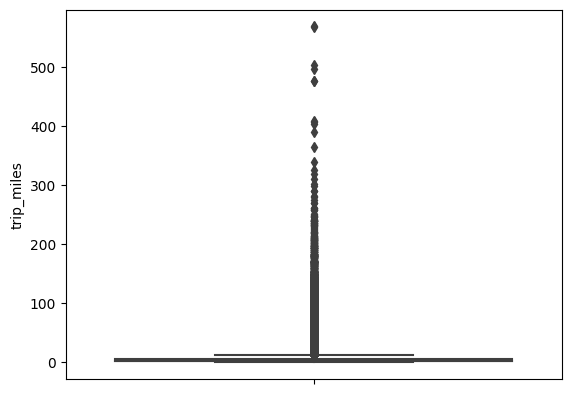

In [29]:
sns.boxplot(data = tlc_21_07, y="trip_miles");

Se observan numerosos outliers por este método. Quedará determinar si corresponde a errores o es debido a la dispersión de los datos. La superficie de NYC es de aproximadamente 468 millas cuadradas.

## trip_time

In [30]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_time.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [31]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.trip_time.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     1.104897e+03
std      7.813146e+02
min      0.000000e+00
25%      5.810000e+02
50%      9.060000e+02
75%      1.400000e+03
max      4.330000e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     1.102233e+03
std      7.772306e+02
min      0.000000e+00
25%      5.770000e+02
50%      9.020000e+02
75%      1.401000e+03
max      8.376300e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.170471e+03
std      8.399548e+02
min      0.000000e+00
25%      6.050000e+02
50%      9.520000e+02
75%      1.486000e+03
max      7.671200e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.168755e+03
std      8.521446e+02
min      0.000000e+00
25%      6.110000e+02
50%      9.590000e+02
75%      1.486000e+03
max      1.684770e+05
Name: trip_time, dtype: float64

La descripción de cada mes es: count    

Tiempos de viaje de 0 segundos podrían ser errores. Veamos algunos casos.

In [32]:
tlc_21_07[tlc_21_07.trip_time == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2037988,HV0004,B02800,None,2021-07-05 01:45:15,NaT,2021-07-05 02:25:03,2021-07-05 02:25:03,166,151,0.0,0,0.0,0.0,0.0,0.0,0.0,Y,N,N,N,N
2241231,HV0004,B02800,None,2021-07-05 16:28:42,NaT,2021-07-05 16:45:49,2021-07-05 16:45:49,225,145,0.0,0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N
2636966,HV0004,B02800,None,2021-07-06 16:17:22,NaT,2021-07-06 16:17:41,2021-07-06 16:17:41,132,244,0.0,0,0.0,0.0,0.0,0.0,0.0,Y,N,N,N,N
2862047,HV0004,B02800,None,2021-07-07 06:04:36,NaT,2021-07-07 06:07:10,2021-07-07 06:07:10,132,68,0.0,0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N
2970387,HV0004,B02800,None,2021-07-07 10:45:36,NaT,2021-07-07 11:03:09,2021-07-07 11:03:09,51,182,0.0,0,0.0,0.0,0.0,0.0,0.0,Y,N,N,N,N


En estos casos, el pickup_time coincide con el dropoff_time, por lo que es factible que se trate de errores. Hagamos un análisis preliminar de outliers.

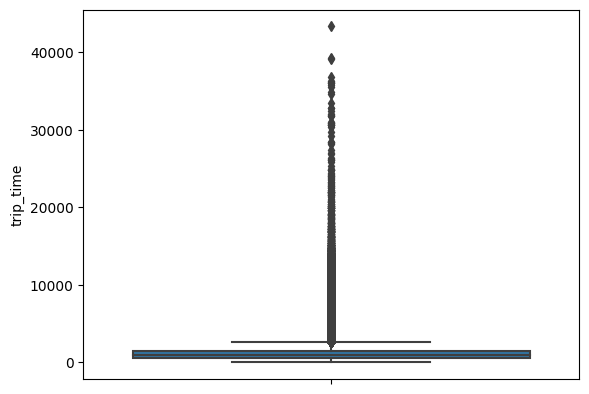

In [33]:
sns.boxplot(data = tlc_21_07, y="trip_time");

También se observan numerosos outliers que corresponderá estudiar.

## base_passenger_fare

In [34]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.base_passenger_fare.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [35]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.base_passenger_fare.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     2.343130e+01
std      1.863994e+01
min     -2.447900e+02
25%      1.178000e+01
50%      1.858000e+01
75%      2.883000e+01
max      3.014760e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     2.320615e+01
std      1.861520e+01
min     -1.214800e+02
25%      1.161000e+01
50%      1.830000e+01
75%      2.856000e+01
max      2.176520e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     2.402892e+01
std      1.931969e+01
min     -1.177500e+02
25%      1.187000e+01
50%      1.899000e+01
75%      2.958000e+01
max      1.369650e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     2.266084e+01
std      1.776876e+01
min     -2.294700e+02
25%      1.143000e+01
50%      1.793000e+01
75%      2.789000e+01
max      1.885140e+03
Name: base_passenger_fare, dtype: float64



Las tarifas negativas probablemente sean errores. Aquellas tarifas en el orden de 10^3, también es posible que sean errores, por alejarse del resto de los cuartilos. Hagamos un análisis preliminar de outliers.

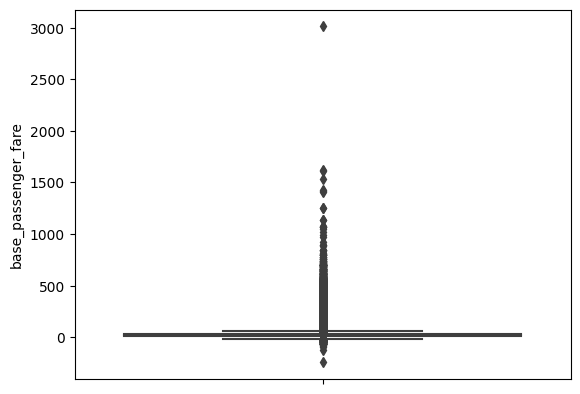

In [36]:
sns.boxplot(data = tlc_21_07, y="base_passenger_fare");

Se observan numerosos outliers por este método, por lo que corresponderá revisar si corresponden a errores en los datos o no.

## tolls

In [37]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.tolls.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [38]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.tolls.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     9.691945e-01
std      3.539888e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.342000e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     9.919853e-01
std      3.561268e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.009000e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.053719e+00
std      3.667431e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.043500e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.053219e+00
std      3.699368e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.081000e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.604164e+07
mea

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

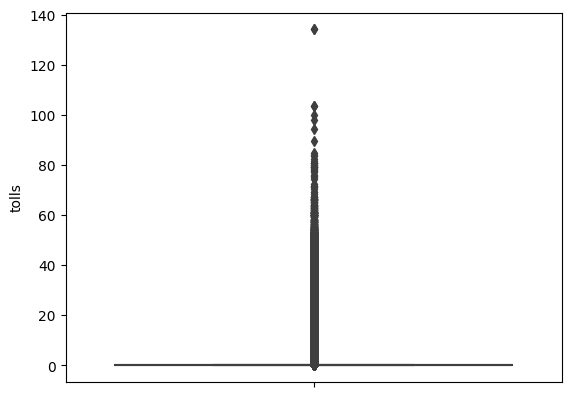

In [39]:
sns.boxplot(data = tlc_21_07, y="tolls");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## bcf

In [40]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.bcf.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [41]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.bcf.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     7.273840e-01
std      6.265779e-01
min      0.000000e+00
25%      3.500000e-01
50%      5.600000e-01
75%      8.900000e-01
max      9.287000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     7.207217e-01
std      6.255768e-01
min      0.000000e+00
25%      3.400000e-01
50%      5.500000e-01
75%      8.800000e-01
max      6.637000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     7.480434e-01
std      6.489414e-01
min      0.000000e+00
25%      3.500000e-01
50%      5.700000e-01
75%      9.200000e-01
max      4.217000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     7.116322e-01
std      6.066836e-01
min      0.000000e+00
25%      3.400000e-01
50%      5.400000e-01
75%      8.700000e-01
max      6.155000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.604164e+07
mean     7.

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

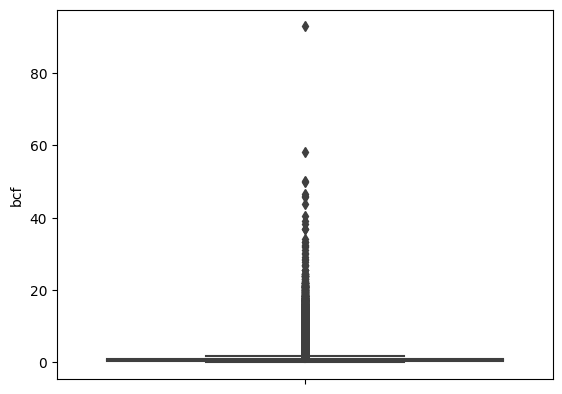

In [42]:
sns.boxplot(data = tlc_21_07, y="bcf");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## sales_tax

In [43]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.sales_tax.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [44]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.sales_tax.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     1.996837e+00
std      1.575921e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.590000e+00
75%      2.520000e+00
max      1.479600e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     1.976329e+00
std      1.567873e+00
min      0.000000e+00
25%      9.700000e-01
50%      1.570000e+00
75%      2.480000e+00
max      1.963500e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     2.050011e+00
std      1.649110e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.620000e+00
75%      2.590000e+00
max      1.159900e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.933251e+00
std      1.525886e+00
min      0.000000e+00
25%      9.500000e-01
50%      1.530000e+00
75%      2.440000e+00
max      1.691700e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

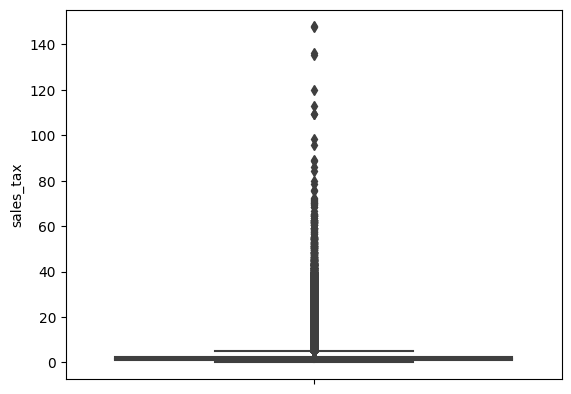

In [45]:
sns.boxplot(data = tlc_21_07, y="sales_tax");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## congestion_surcharge

In [46]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.congestion_surcharge.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [47]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.congestion_surcharge.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     1.054438e+00
std      1.346027e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     1.034370e+00
std      1.331436e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.124913e+00
std      1.362014e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      1.375000e+01
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.171446e+00
std      1.371004e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      1.100000e+01
Name: congestion_surcharge, dtype: float

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

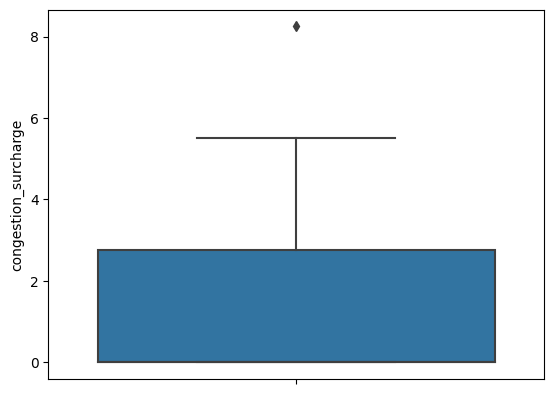

In [48]:
sns.boxplot(data = tlc_21_07, y="congestion_surcharge");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## airport_fee

In [49]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.airport_fee.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [50]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.airport_fee.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     1.507554e-01
std      5.988120e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.400000e+00
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     1.612738e-01
std      6.186799e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.613575e-01
std      6.201968e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.626970e-01
std      6.195806e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.400000e+00
Name: airport_fee, dtype: float64

La descripción de cada mes es: c

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

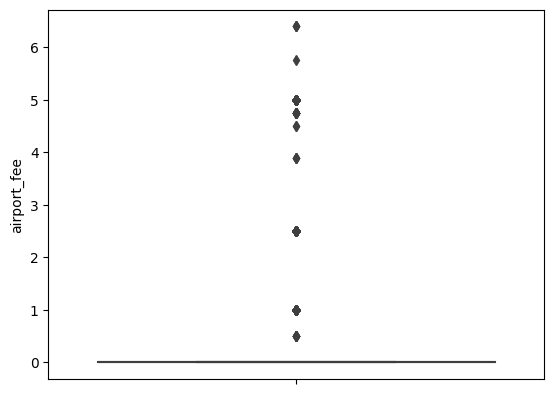

In [51]:
sns.boxplot(data = tlc_21_07, y="airport_fee");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## tips

In [52]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.tips.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [53]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.tips.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     8.998799e-01
std      2.806631e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.224800e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     9.226492e-01
std      2.857448e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.016972e+00
std      3.098378e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.011932e+00
std      2.980326e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.604164e+07
mean   

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

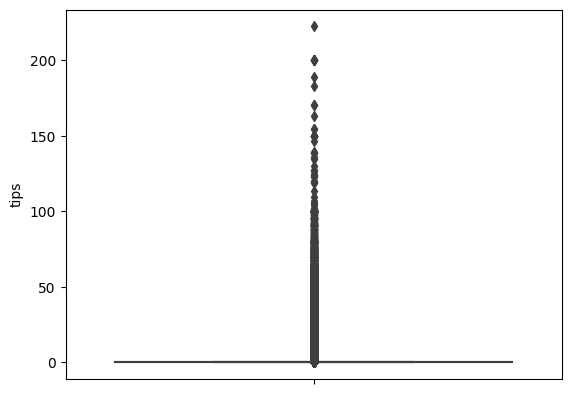

In [54]:
sns.boxplot(data = tlc_21_07, y="tips");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## driver_pay

In [55]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.driver_pay.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [56]:
for df in tlc_21_S2:
    print(f"La descripción de cada mes es: "
          f"{df.driver_pay.describe()}\n")

La descripción de cada mes es: count    1.502717e+07
mean     1.836417e+01
std      1.436208e+01
min     -7.655000e+01
25%      9.160000e+00
50%      1.465000e+01
75%      2.301000e+01
max      1.658120e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.449970e+07
mean     1.822541e+01
std      1.436506e+01
min     -5.119000e+01
25%      9.130000e+00
50%      1.441000e+01
75%      2.280000e+01
max      1.571080e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.488606e+07
mean     1.938026e+01
std      1.480998e+01
min     -1.143000e+01
25%      9.830000e+00
50%      1.541000e+01
75%      2.429000e+01
max      9.724500e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.654536e+07
mean     1.884818e+01
std      1.402639e+01
min     -9.133000e+01
25%      9.750000e+00
50%      1.505000e+01
75%      2.350000e+01
max      1.145450e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count

Los valores negativos es probable que sean errores. Haremos un análisis preliminar de outliers.

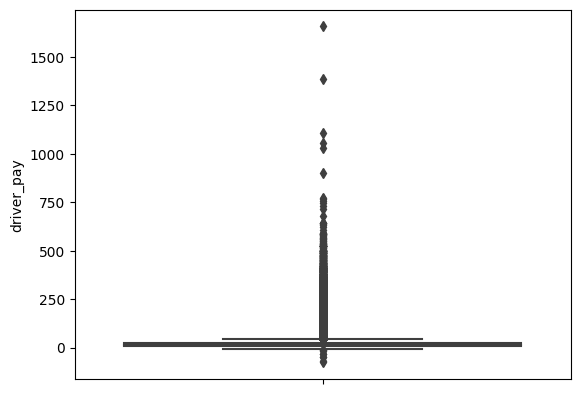

In [57]:
sns.boxplot(data = tlc_21_07, y="driver_pay");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## shared_request_flag

In [58]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [59]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.shared_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N']
Los valores únicos por mes: ['N']


Las proporciones de usuarios que solicitaron compartir viajes fueron:

In [60]:
for df in tlc_21_S2:
    print(df.shared_request_flag.value_counts(normalize=True), "\n")

shared_request_flag
N    0.995825
Y    0.004175
Name: proportion, dtype: float64 

shared_request_flag
N    0.994843
Y    0.005157
Name: proportion, dtype: float64 

shared_request_flag
N    0.995063
Y    0.004937
Name: proportion, dtype: float64 

shared_request_flag
N    0.998476
Y    0.001524
Name: proportion, dtype: float64 

shared_request_flag
N    1.0
Name: proportion, dtype: float64 

shared_request_flag
N    1.0
Name: proportion, dtype: float64 



## shared_match_flag

In [61]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [62]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.shared_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [63]:
for df in tlc_21_S2:
    print(df.shared_match_flag.value_counts(normalize=True), "\n")

shared_match_flag
N    0.998688
Y    0.001312
Name: proportion, dtype: float64 

shared_match_flag
N    0.998358
Y    0.001642
Name: proportion, dtype: float64 

shared_match_flag
N    0.998138
Y    0.001862
Name: proportion, dtype: float64 

shared_match_flag
N    0.999388
Y    0.000612
Name: proportion, dtype: float64 

shared_match_flag
N    0.999897
Y    0.000103
Name: proportion, dtype: float64 

shared_match_flag
N    0.999944
Y    0.000056
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros compartieron viajes.

## access_a_ride_flag

In [64]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.access_a_ride_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [65]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.access_a_ride_flag.unique()}")

Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']


Según el diccionario de datos, esta columna puede tomar los valores 'Y' o 'N'. La presencia de un string vacio puede hablar de problemas en la calidad de los datos.

## wav_request_flag

In [66]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [67]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.wav_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [68]:
for df in tlc_21_S2:
    print(df.wav_request_flag.value_counts(normalize=True), "\n")

wav_request_flag
N    0.99848
Y    0.00152
Name: proportion, dtype: float64 

wav_request_flag
N    0.99853
Y    0.00147
Name: proportion, dtype: float64 

wav_request_flag
N    0.998839
Y    0.001161
Name: proportion, dtype: float64 

wav_request_flag
N    0.998909
Y    0.001091
Name: proportion, dtype: float64 

wav_request_flag
N    0.99889
Y    0.00111
Name: proportion, dtype: float64 

wav_request_flag
N    0.998876
Y    0.001124
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros solicitaron vehículos accesibles para sillas de ruedas.

## wav_match_flag

In [69]:
for df in tlc_21_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [70]:
for df in tlc_21_S2:
    print(f"Los valores únicos por mes: "
          f"{df.wav_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [71]:
for df in tlc_21_S2:
    print(df.wav_match_flag.value_counts(normalize=True), "\n")

wav_match_flag
N    0.945346
Y    0.054654
Name: proportion, dtype: float64 

wav_match_flag
N    0.943934
Y    0.056066
Name: proportion, dtype: float64 

wav_match_flag
N    0.947947
Y    0.052053
Name: proportion, dtype: float64 

wav_match_flag
N    0.946424
Y    0.053576
Name: proportion, dtype: float64 

wav_match_flag
N    0.944486
Y    0.055514
Name: proportion, dtype: float64 

wav_match_flag
N    0.944288
Y    0.055712
Name: proportion, dtype: float64 



En todos los meses, aproximadamente el 6% de los viajes sucedieron en vehículos accesibles para sillas de ruedas.